# Heart Disease Prediction - Group 9

Group Members:


*   Barış Baran AYDOĞAN 28425
*   Mehmet Talha GÜVEN 27829
*   Egehan IŞILDAR 25281





# **Introduction**

The dataset “Heart Disease Prediction” refers to the presence of heart disease in the patient. There are several reasons why the dataset “Heart Disease Prediction” was collected based on this research: Firstly, the data was collected in the light of which attributes of patients are more effective on having a heart disease. Secondly, to find out relationship between different attributes and final disease statement. As a consequence, our first aim is determine which main attributes are cause to having a heart disease, after that we aim to examine relationship between selected attributes and heart disease statement. 

We will focus on analyzing the variables and determining the relationships between them. Our end goal is creating a machine learning model which will determine what attributes are crucial for heart disease.

# ****Utilized Dataset****

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%matplotlib inline

In [4]:
#Heart Disease Dataset
#https://www.kaggle.com/datasets/meetnagadia/heart-disease
df = pd.read_csv('/content/heart_disease.csv')

#Stroke Prediction Dataset (Additional Dataset)
#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
df_extra = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')


In [5]:
df['HeartDisease'] = df.AHD.astype('category')
df['Sex'] = df.Sex.astype('category')
df['ChestPainType'] = df.ChestPain.astype('category')
df['ExerciseAngina'] = df.ExAng.astype('category')

In [6]:
df.describe()

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,9.038662,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [7]:
df_extra.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df.shape

(303, 17)

In [9]:
df_extra.shape

(5110, 12)

In [10]:
df.dtypes

Age                  int64
Sex               category
ChestPain           object
RestBP               int64
Chol                 int64
Fbs                  int64
RestECG              int64
MaxHR                int64
ExAng                int64
Oldpeak            float64
Slope                int64
Ca                 float64
Thal                object
AHD                 object
HeartDisease      category
ChestPainType     category
ExerciseAngina    category
dtype: object

In [11]:
df_extra.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [12]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD,HeartDisease,ChestPainType,ExerciseAngina
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No,No,typical,0
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes,Yes,asymptomatic,1
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes,Yes,asymptomatic,1
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No,No,nonanginal,0
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No,No,nontypical,0


In [13]:
df_extra.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             303 non-null    int64   
 1   Sex             303 non-null    category
 2   ChestPain       303 non-null    object  
 3   RestBP          303 non-null    int64   
 4   Chol            303 non-null    int64   
 5   Fbs             303 non-null    int64   
 6   RestECG         303 non-null    int64   
 7   MaxHR           303 non-null    int64   
 8   ExAng           303 non-null    int64   
 9   Oldpeak         303 non-null    float64 
 10  Slope           303 non-null    int64   
 11  Ca              299 non-null    float64 
 12  Thal            301 non-null    object  
 13  AHD             303 non-null    object  
 14  HeartDisease    303 non-null    category
 15  ChestPainType   303 non-null    category
 16  ExerciseAngina  303 non-null    category
dtypes: category(4), 

In [15]:
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
df.isna().sum()

Age               0
Sex               0
ChestPain         0
RestBP            0
Chol              0
Fbs               0
RestECG           0
MaxHR             0
ExAng             0
Oldpeak           0
Slope             0
Ca                4
Thal              2
AHD               0
HeartDisease      0
ChestPainType     0
ExerciseAngina    0
dtype: int64

In [17]:
df_extra.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

 **-> Missing Value Treatment**



In [18]:
#Missing Values Treatment
df['Ca'].fillna(0,inplace = True)
df['Thal'].fillna(0,inplace = True)

In [19]:
df.isna().sum()

Age               0
Sex               0
ChestPain         0
RestBP            0
Chol              0
Fbs               0
RestECG           0
MaxHR             0
ExAng             0
Oldpeak           0
Slope             0
Ca                0
Thal              0
AHD               0
HeartDisease      0
ChestPainType     0
ExerciseAngina    0
dtype: int64

## Exploratory Data Analysis

In [20]:
df
df["Sex"].replace(0, 'Female',inplace=True)
df["Sex"].replace(1, 'Male',inplace=True)


In [21]:
def histogram(col, title):
  plt.figure(figsize = (12,8))
  ax = sns.histplot(col, kde=False)
  values = np.array([patch.get_height() for patch in ax.patches])
  norm = plt.Normalize(values.min(), values.max())
  colors = plt.cm.RdBu_r(norm(values))

  for patch, color in zip(ax.patches, colors):
    patch.set_color(color)

  plt.title(title, size = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb336ec2750>,
      dtype=object)

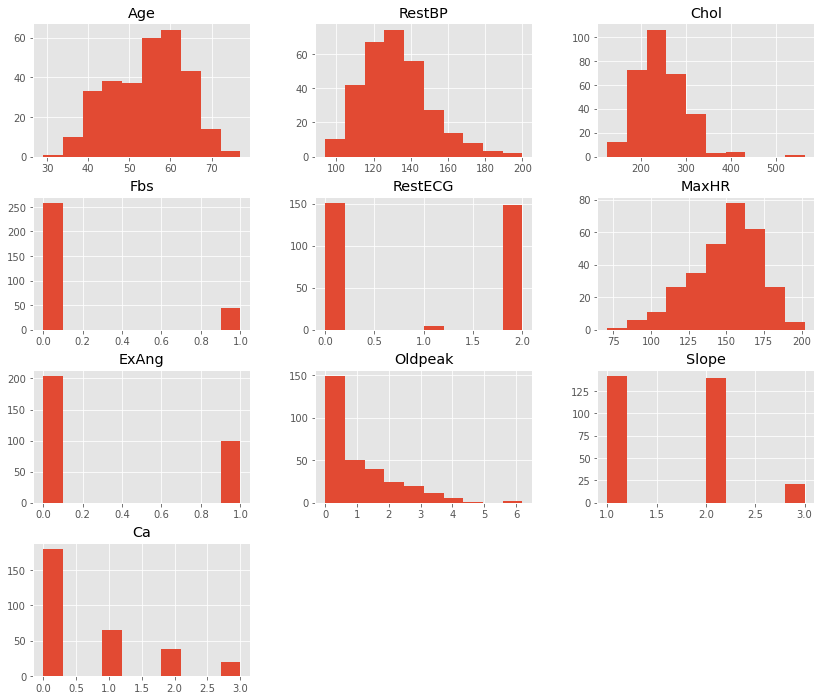

In [22]:
df.corr()
exclude = []
df.loc[:, df.columns.difference(exclude)].hist(figsize = (14,12)) 


In [23]:

colors = ['#003f5c', '#ffa600', 'darkorange', 'lightgreen']
s = df.Sex.value_counts()
name = ["MALE", "FEMALE"]
fig = px.pie(df,values = s.values, names=name)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', marker=dict(colors=colors, line=dict(color='#000000', width=0)))
fig.update_layout(
    title={
        'text': "Gender",
        'yanchor': 'top',
        })
fig.show()

In [24]:
s=df.AHD.value_counts()
name=["NO","YES"]
fig = px.pie(df, values=s.values ,names=name)
fig.update_traces(textposition='inside', textinfo='percent+label', marker=dict(colors=colors, line=dict(color='#000000', width=0)))
fig.update_layout(
    title={
        'text': "Heart Disease?",
        'yanchor': 'top'
        })
fig.show()

In [25]:
categorical_list = ["Sex","Fbs","RestECG","ExAng","Slope","Ca", "RestBP", "Oldpeak", "ChestPain", "HeartDisease"]

categorical_list2 = ["Fbs","ExAng", "Age", "Sex", "RestECG","Slope"]


Text(0.5, 1.0, 'Chest Pain / Heart Disease')

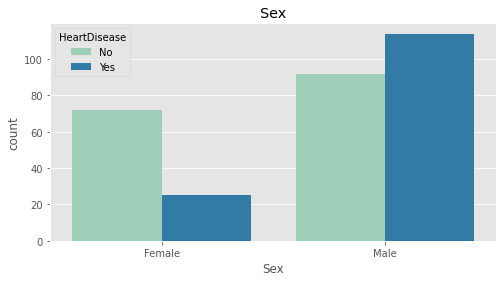

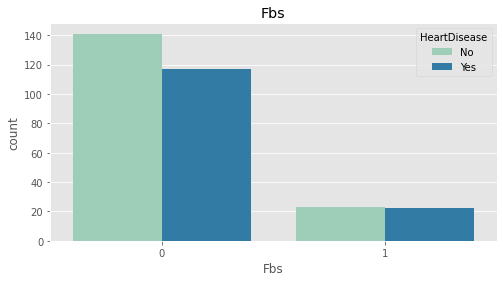

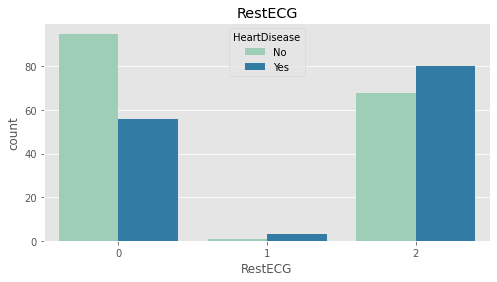

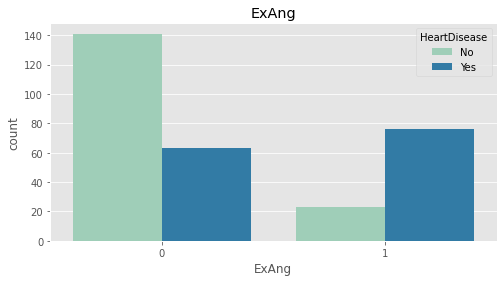

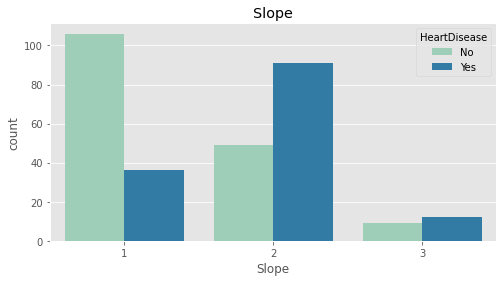

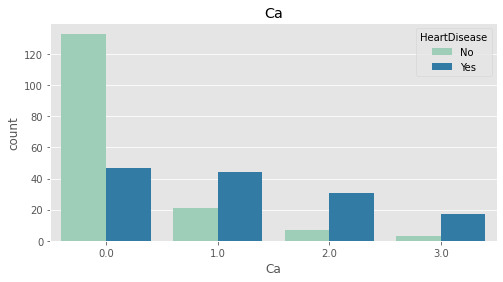

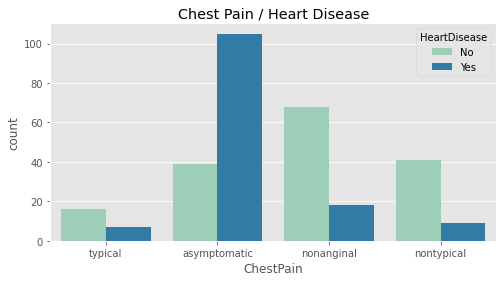

In [26]:
#Sex
plt.figure(figsize = (8,4))
sns.countplot(x = "Sex", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Sex")
#Fbs
plt.figure(figsize = (8,4))
sns.countplot(x = "Fbs", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Fbs")
#RestECG
plt.figure(figsize = (8,4))
sns.countplot(x = "RestECG", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("RestECG")
#ExAng
plt.figure(figsize = (8,4))
sns.countplot(x = "ExAng", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("ExAng")
#Slope
plt.figure(figsize = (8,4))
sns.countplot(x = "Slope", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Slope")
#Ca
plt.figure(figsize = (8,4))
sns.countplot(x = "Ca", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Ca")
#ChestPain
plt.figure(figsize = (8,4))
sns.countplot(x = "ChestPain", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Chest Pain / Heart Disease")

Text(0.5, 1.0, 'RestBP')

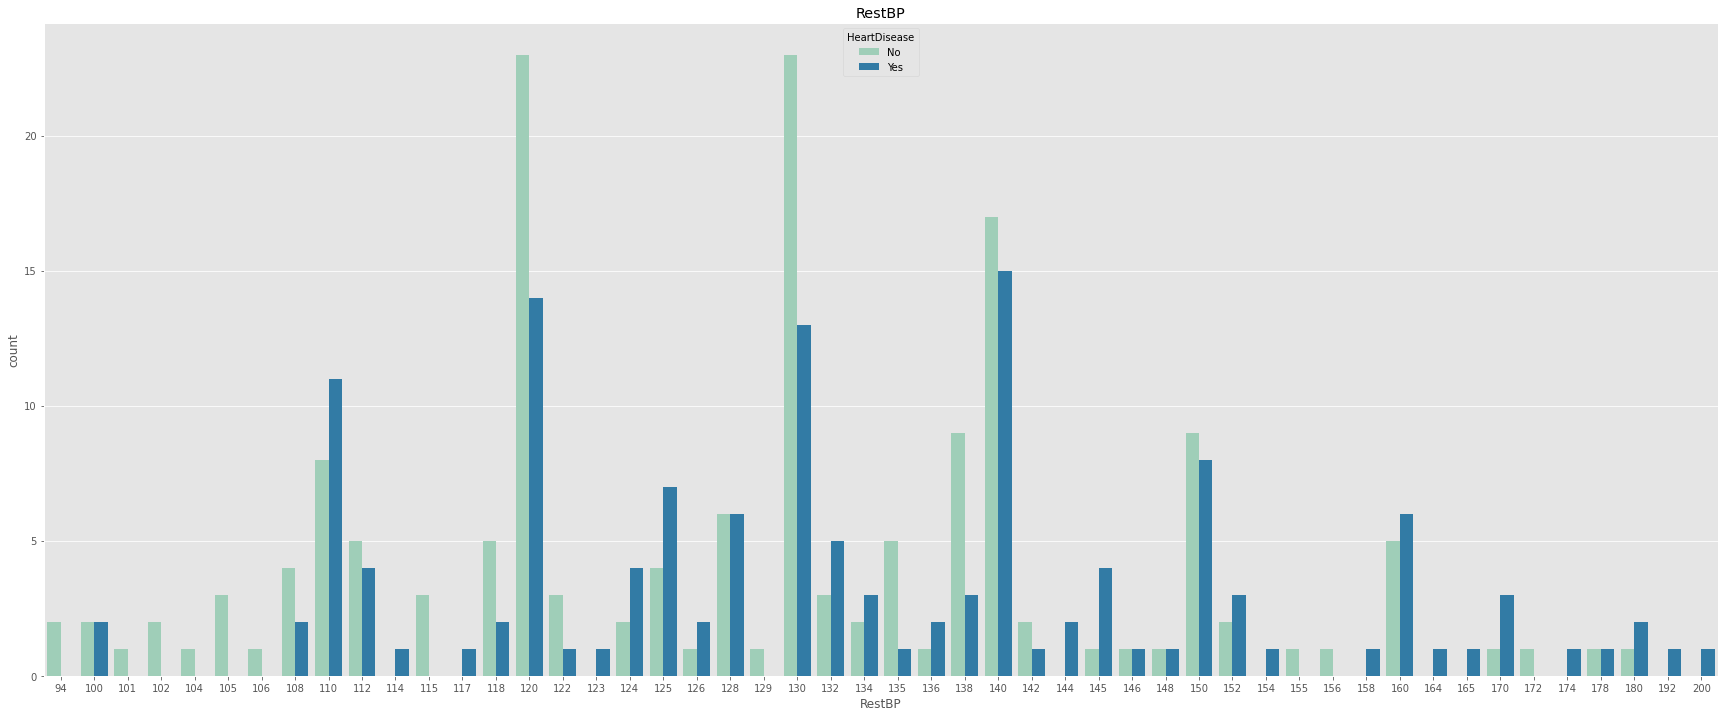

In [27]:
#RestBP
plt.figure(figsize = (30,12))
sns.countplot(x = "RestBP", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("RestBP")

Text(0.5, 1.0, 'Oldpeak')

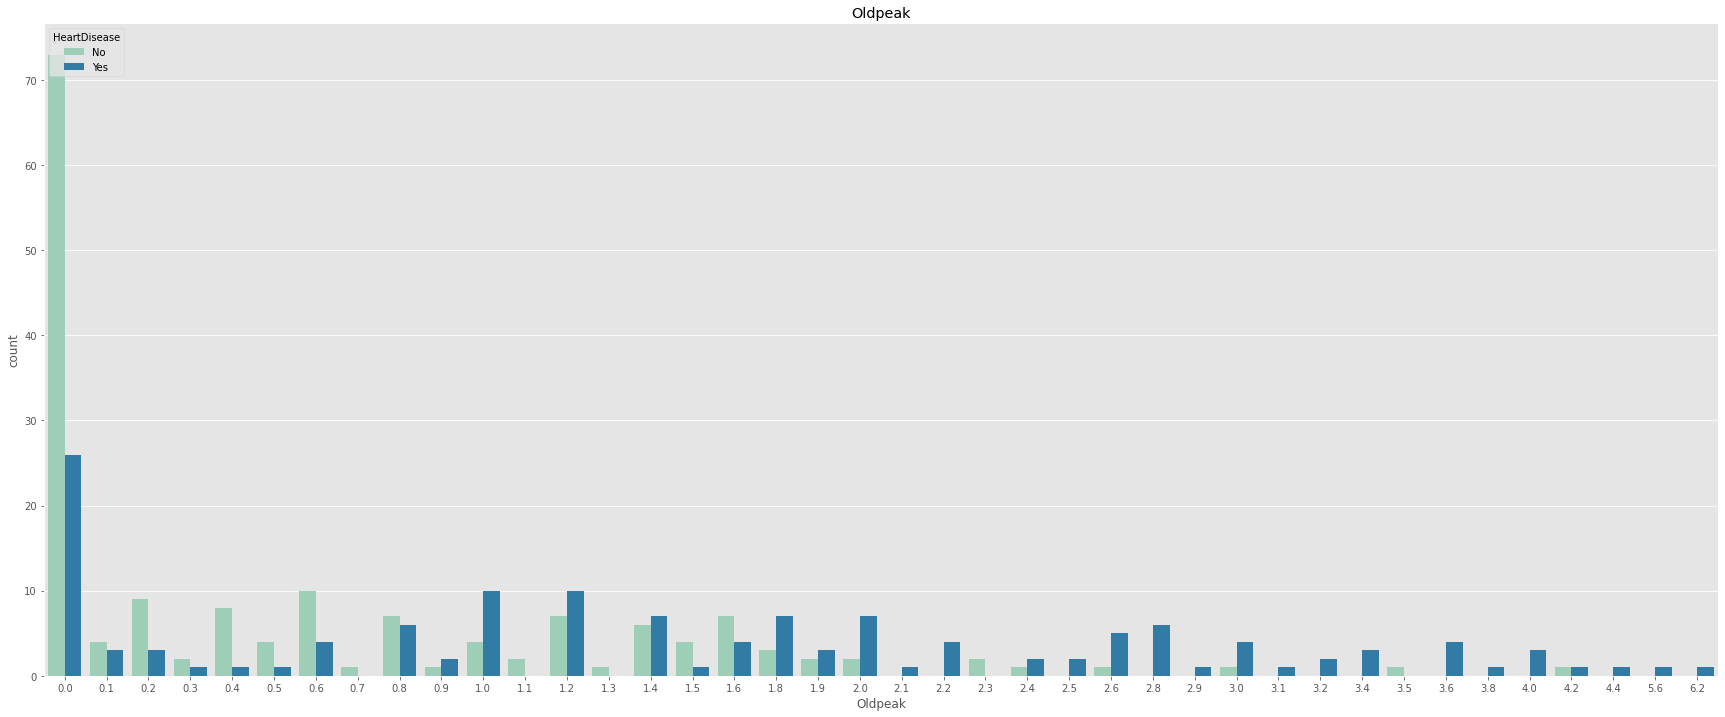

In [28]:
#OldPeak
plt.figure(figsize = (30,12))
sns.countplot(x = "Oldpeak", data = df,hue = "HeartDisease", palette="YlGnBu")
plt.title("Oldpeak")

<Figure size 2520x864 with 0 Axes>

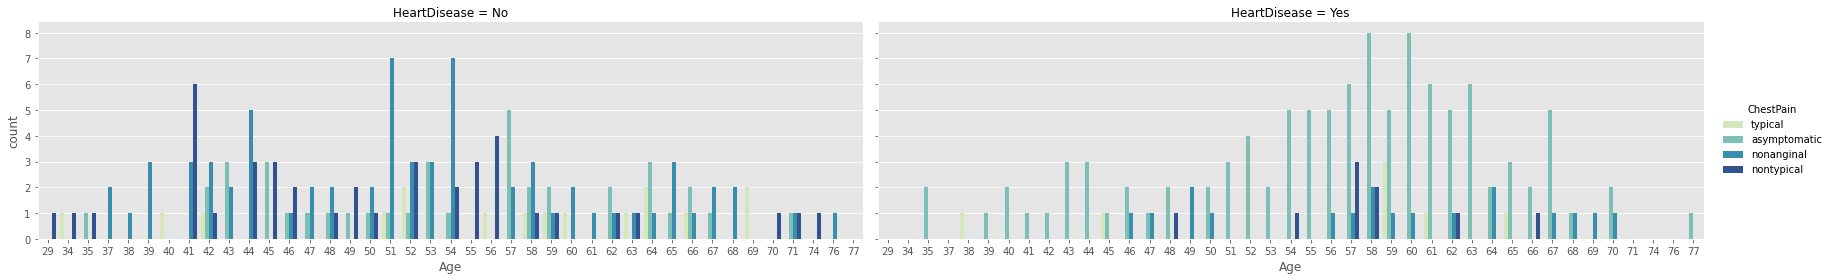

In [29]:
# Chest Pain Types when comparing with Age and Heart Disease
categorical_list5 = ["ChestPain", "Age", "Sex", "ExAng", "HeartDisease"]
df_categoric = df.loc[:, categorical_list5]
df["Sex"].replace(0, 'Female',inplace=True)
df["Sex"].replace(1, 'Male',inplace=True)
plt.figure(figsize = (35,12))
g = sns.catplot(x = "Age", data = df, col = "HeartDisease" ,hue = "ChestPain", kind = "count",height=4, aspect=3, palette = "YlGnBu")

<Figure size 2520x864 with 0 Axes>

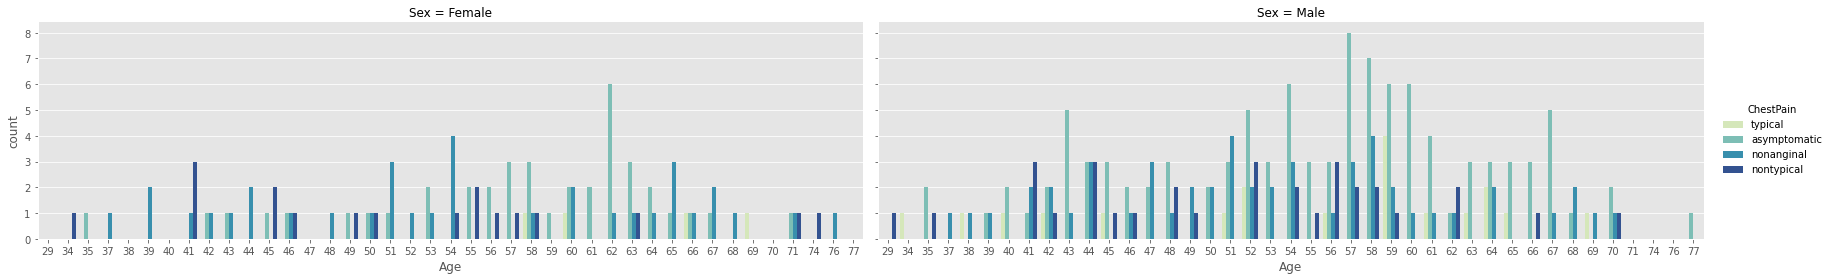

In [30]:
# Chest Pain Types when comparing with Age and Gender
categorical_list6 = ["ChestPain", "Age", "Sex", "ExAng"]
df_categoric = df.loc[:, categorical_list6]
plt.figure(figsize = (35,12))
g = sns.catplot(x = "Age", data = df, col = "Sex" ,hue = "ChestPain", kind = "count",height=4, aspect=3, palette = "YlGnBu")

<Figure size 2520x864 with 0 Axes>

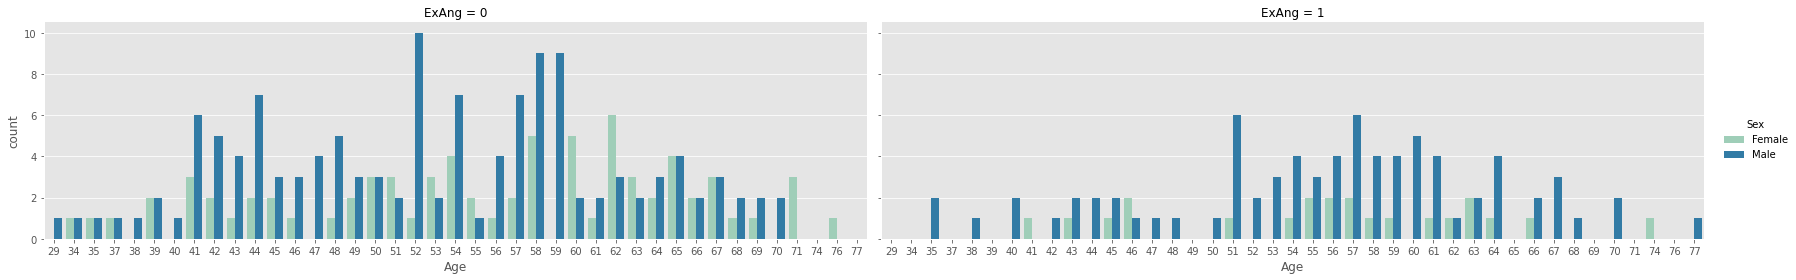

In [31]:
# ExAng when comparing with Age and Gender
categorical_list3 = ["Fbs", "Age", "Sex", "ExAng"]
df_categoric = df.loc[:, categorical_list3]
df["Sex"].replace(0, 'Female',inplace=True)
df["Sex"].replace(1, 'Male',inplace=True)
plt.figure(figsize = (35,12))
g = sns.catplot(x = "Age", data = df, col = "ExAng" ,hue = "Sex", kind = "count",height=4, aspect=3, palette = "YlGnBu")


<Figure size 2880x864 with 0 Axes>

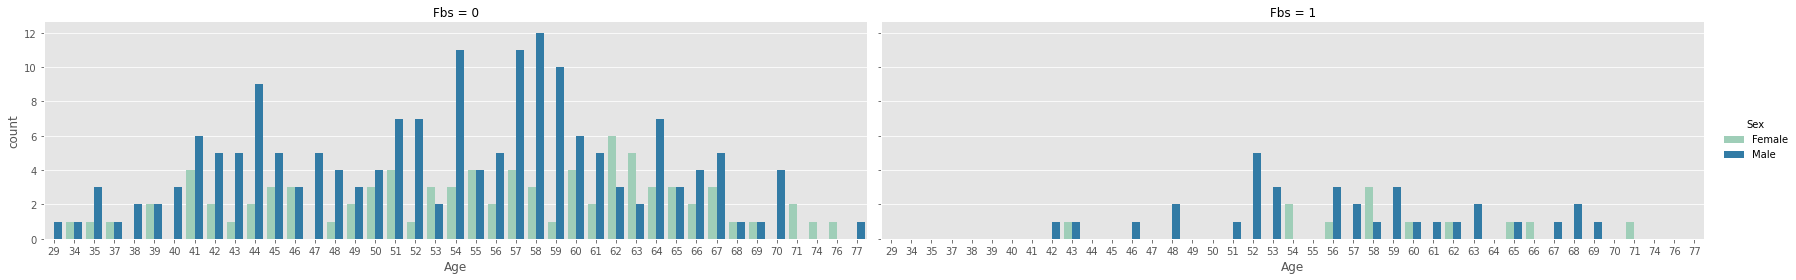

In [32]:
# Fbs when comparing with Age and Gender

df["Sex"].replace(0, 'Female',inplace=True)
df["Sex"].replace(1, 'Male',inplace=True)
df["Fbs"].replace('No', 0 ,inplace=True)
df["Fbs"].replace('Yes',1,inplace=True)
plt.figure(figsize = (40,12))
g = sns.catplot(x = "Age", data = df, col = "Fbs",hue = "Sex", kind = "count",height=4, aspect=3, palette = "YlGnBu")


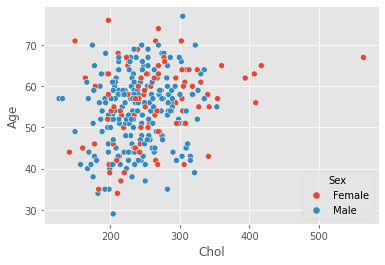

In [33]:
# Scatter Plot graph of Chol with respect to Age and Sex
sns.scatterplot(data=df, x="Chol", y="Age", hue="Sex")


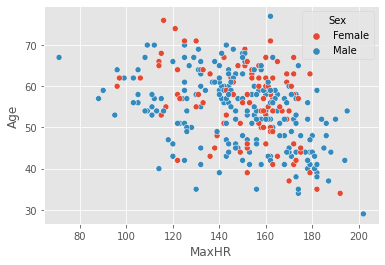

In [34]:
# Scatter Plot graph of MaxHR with respect to Age and Sex
sns.scatterplot(data=df, x="MaxHR", y="Age", hue="Sex")


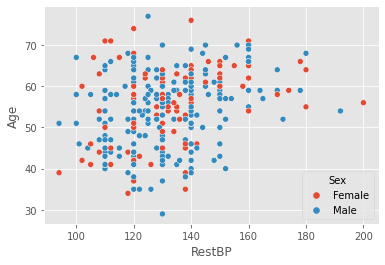

In [35]:
# Scatter Plot graph of RestBP with respect to Age and Sex
sns.scatterplot(data=df, x="RestBP", y="Age", hue="Sex")

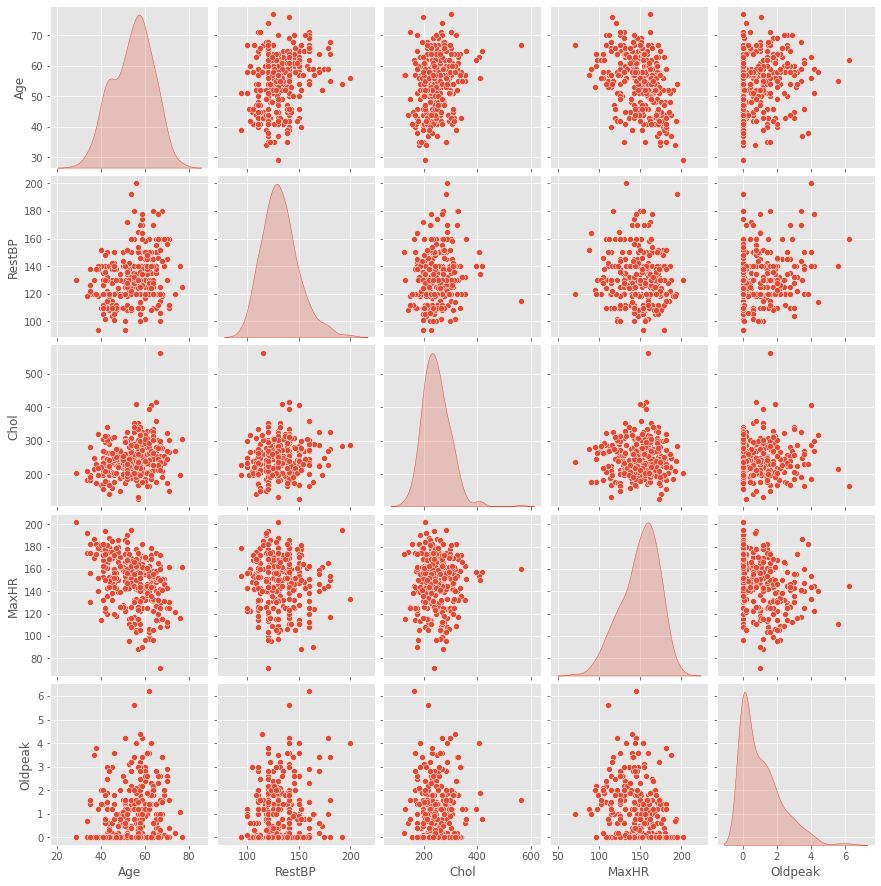

In [36]:
# Pair Correleation Scatter Plots for each attiributes

from sklearn.preprocessing import StandardScaler, MinMaxScaler
numeric_list = ["Age","RestBP", "Chol", "MaxHR", "Oldpeak"]
df_numeric = df.loc[:, numeric_list]
sns.pairplot(df_numeric, diag_kind = "kde")

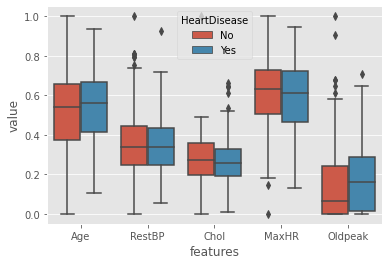

In [37]:
# Box Plot Represantation for correlation of some selected features -Age, RestBP, Chol, MaxHR, Oldpeak- with Heart Disease.

df["Sex"].replace('Female', 0 ,inplace=True)
df["Sex"].replace('Male', 1 ,inplace=True)
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_numeric)
df_scaled_array = pd.DataFrame(scaled_array, columns = numeric_list)

df_scaled_array = pd.concat([df_scaled_array, df.loc[:, "HeartDisease"]], axis = 1)

data_melted = pd.melt(df_scaled_array, id_vars = "HeartDisease", var_name = "features", value_name = "value")

# box plot
plt.figure()

sns.boxplot(x = "features", y = "value", hue = "HeartDisease", data= data_melted)
plt.show()

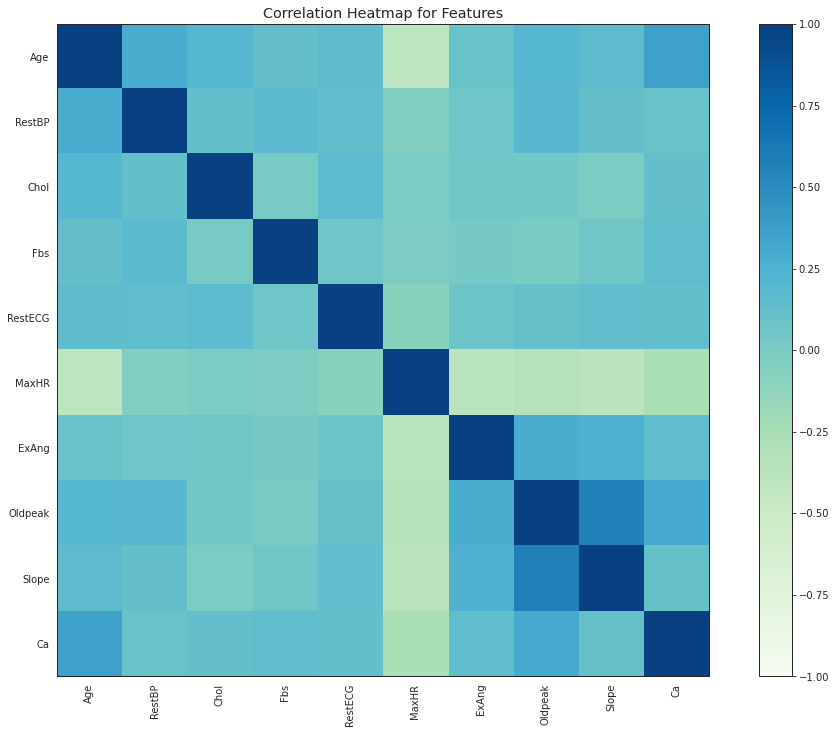

In [38]:
# Another representation for showing the relationship/correlation between features
plt.figure(figsize = (18,12))
sns.set_style("white")
plt.imshow(df.corr(), cmap="GnBu", vmin = -1, vmax = 1)
plt.colorbar()
plt.xticks(range(len(df.corr())),df.corr().columns, rotation=90)
plt.yticks(range(len(df.corr())),df.corr().index)
plt.title('Correlation Heatmap for Features')
plt.show()

<Figure size 8000x8000 with 0 Axes>

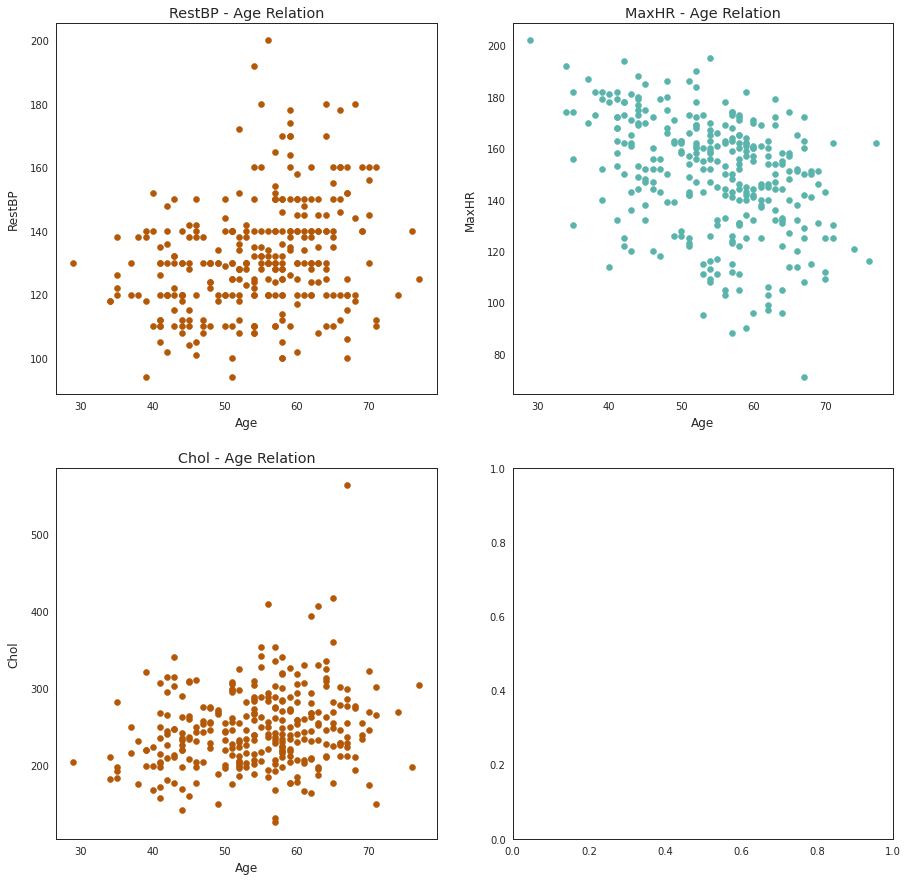

In [39]:
# Age and some selected features -RestBP, MaxHR, Chol- relationship representation via scatter plot

f = plt.figure(figsize = (100,100), dpi= 80)
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=False, sharey = False, figsize=(15,15))
norm=plt.Normalize(-300, 300)


axes[0][0].scatter(df.Age ,df.RestBP, marker = 'o',color="#b35806" )
axes[0][0].set_ylabel('RestBP', labelpad = 10)
axes[0][0].set_xlabel('Age', labelpad = 5)
axes[0][0].set_title('RestBP - Age Relation')

axes[0][1].scatter(df.Age ,df.MaxHR, marker = 'o',color="#5ab4ac" )
axes[0][1].set_ylabel('MaxHR', labelpad = 10)
axes[0][1].set_xlabel('Age', labelpad = 5)
axes[0][1].set_title('MaxHR - Age Relation')

axes[1][0].scatter(df.Age ,df.Chol, marker = 'o',color="#b35806" )
axes[1][0].set_ylabel('Chol', labelpad = 10)
axes[1][0].set_xlabel('Age', labelpad = 5)
axes[1][0].set_title('Chol - Age Relation')


plt.show()

Text(0.5, 1.0, 'Chest Pain / RestBP')

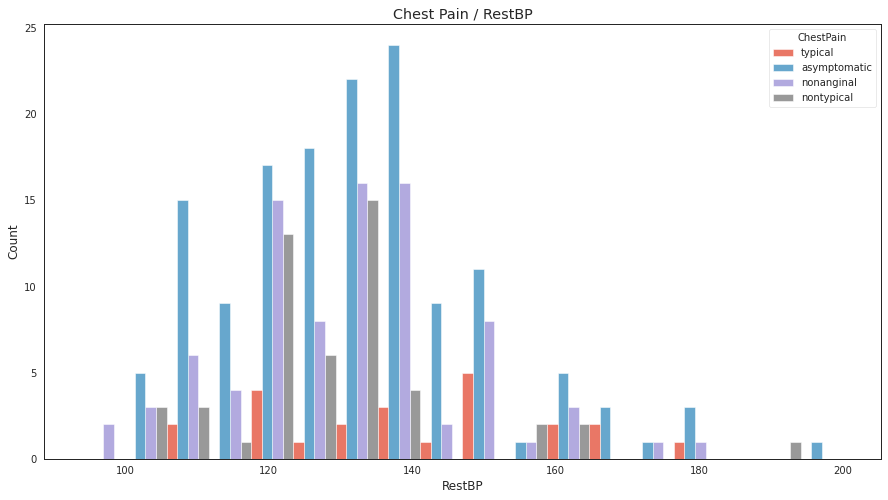

In [40]:
#Distribution of people with respect to Chest Pain Types and RestBP
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="RestBP", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / RestBP")

Text(0.5, 1.0, 'Chest Pain / Chol')

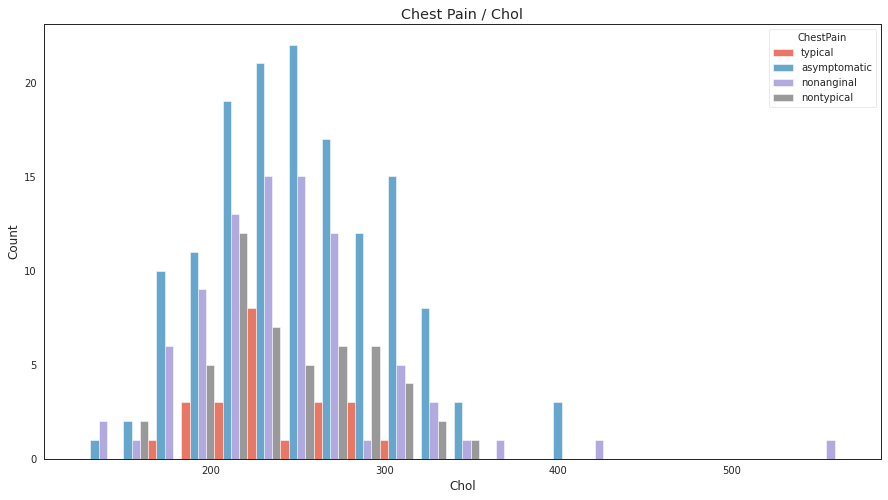

In [41]:
#Distribution of people with respect to Chest Pain Types and Chol
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Chol", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / Chol")

Text(0.5, 1.0, 'Chest Pain / Fbs')

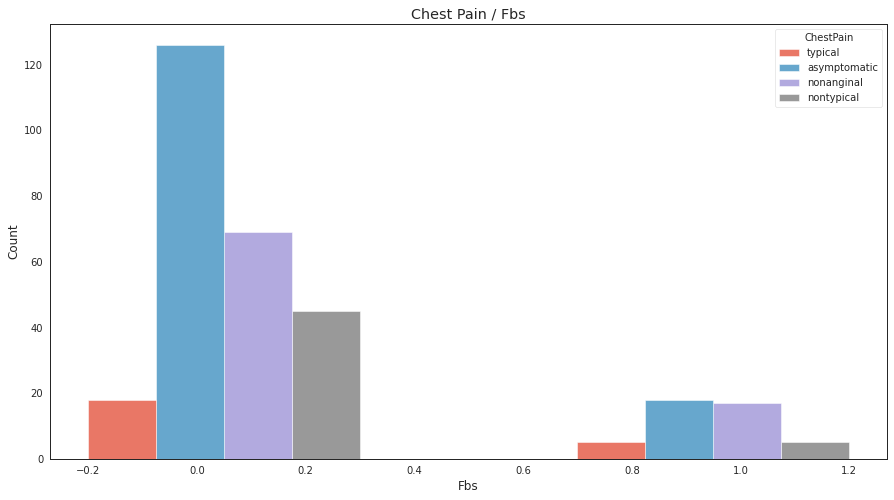

In [42]:
#Distribution of people with respect to Chest Pain Types and Fbs
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Fbs", hue="ChestPain", multiple="dodge", shrink=5)
plt.title("Chest Pain / Fbs")

Text(0.5, 1.0, 'Chest Pain / RestECG')

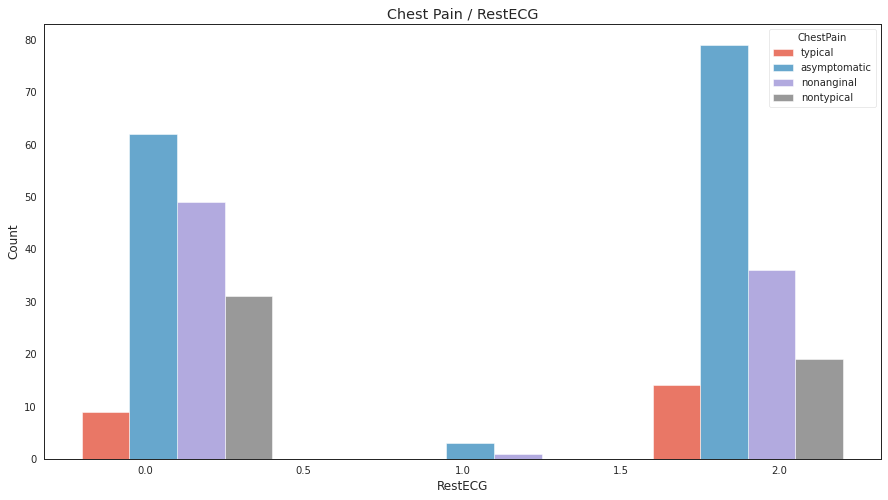

In [43]:
#Distribution of people with respect to Chest Pain Types and RestECG
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="RestECG", hue="ChestPain", multiple="dodge", shrink=3)
plt.title("Chest Pain / RestECG")

Text(0.5, 1.0, 'Chest Pain / MaxHR')

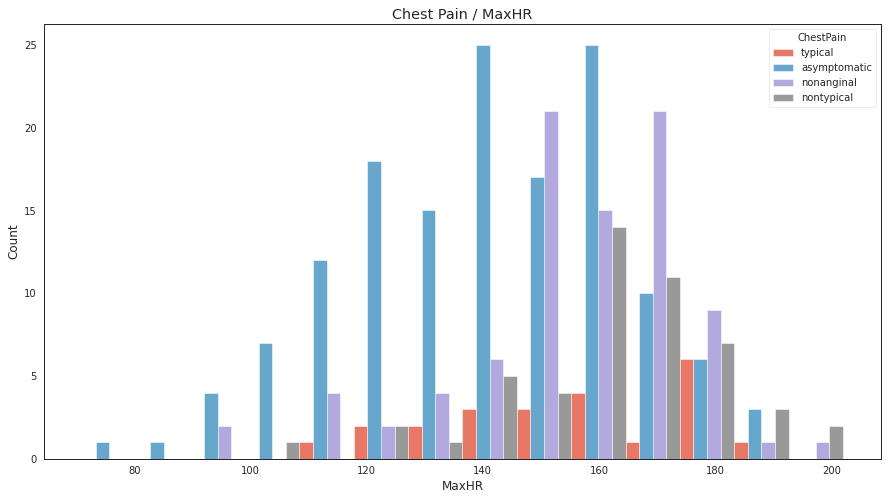

In [44]:
#Distribution of people with respect to Chest Pain Types and MaxHR
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="MaxHR", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / MaxHR")

Text(0.5, 1.0, 'Chest Pain / ExAng')

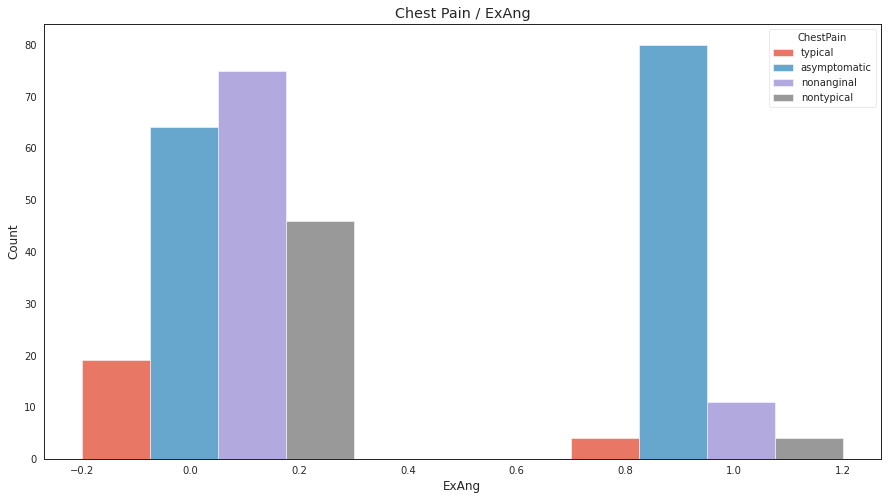

In [45]:
#Distribution of people with respect to Chest Pain Types and ExAng
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="ExAng", hue="ChestPain", multiple="dodge", shrink=5)
plt.title("Chest Pain / ExAng")

Text(0.5, 1.0, 'Chest Pain / Oldpeak')

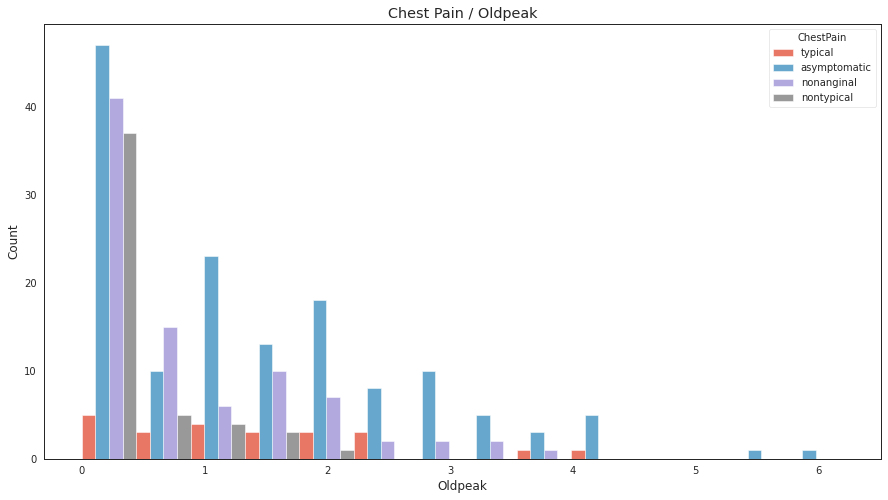

In [46]:
#Distribution of people with respect to Chest Pain Types and Oldpeak
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Oldpeak", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / Oldpeak")

Text(0.5, 1.0, 'Chest Pain / Slope')

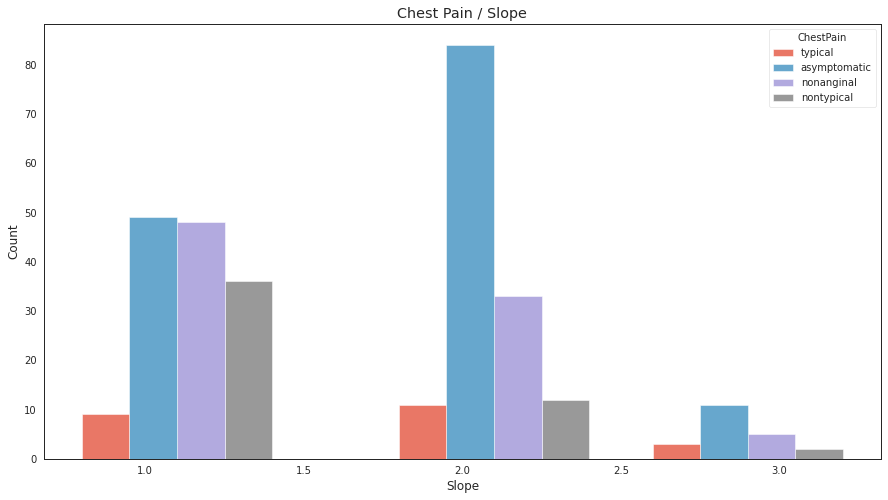

In [47]:
#Distribution of people with respect to Chest Pain Types and Slope
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Slope", hue="ChestPain", multiple="dodge", shrink=3)
plt.title("Chest Pain / Slope")

Text(0.5, 1.0, 'Chest Pain / Ca')

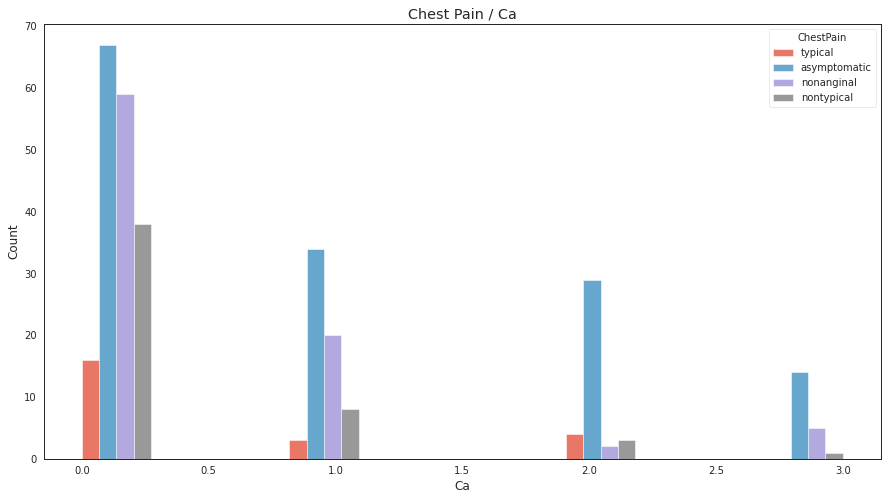

In [48]:
#Distribution of people with respect to Chest Pain Types and Ca
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Ca", hue="ChestPain", multiple="dodge", shrink=1)
plt.title("Chest Pain / Ca")

Text(0.5, 1.0, 'Chest Pain / Gender')

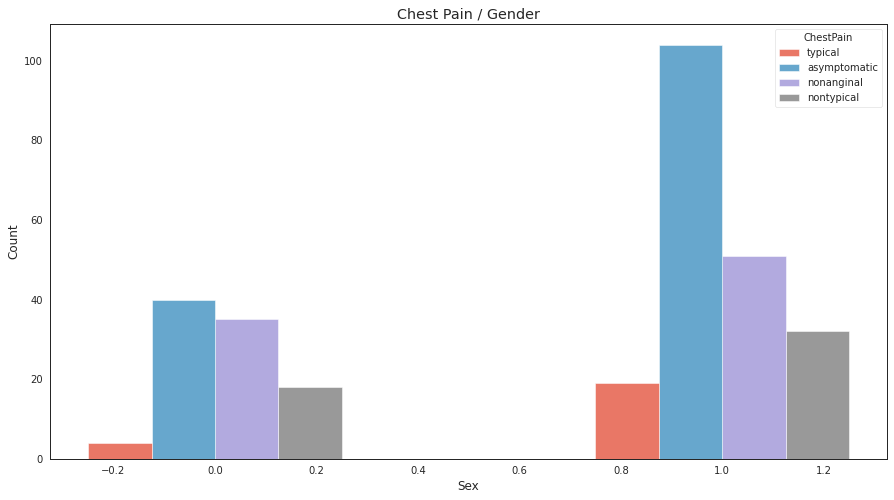

In [49]:
#Distribution of people with respect to Chest Pain Types and Gender
plt.figure(figsize = (15,8))

sns.histplot(data=df, x="Sex", hue="ChestPain", multiple="dodge", shrink=0.5)
plt.title("Chest Pain / Gender")

[-> Stroke Prediction Dataset (Additional Dataset)](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

Heart disease is the second biggest cause of death worldwide, accounting for over 11% of all deaths, according to the World Health Organization (WHO). Based on input criteria such as gender, age, different illnesses, and smoking status, this dataset is used to predict whether a patient is likely to have a heart disease.

In [50]:
# Second dataset
cat_df = df_extra[['gender','Residence_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(cat_df[x], cat_df.stroke) for x in cat_df.columns[:-1]], keys=cat_df.columns[:-1])
strok=df_extra.loc[df_extra['stroke']==1] 
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
Residence_type Rural            2400  114
               Urban            2461  135
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb32d7d3650>,
      dtype=object)

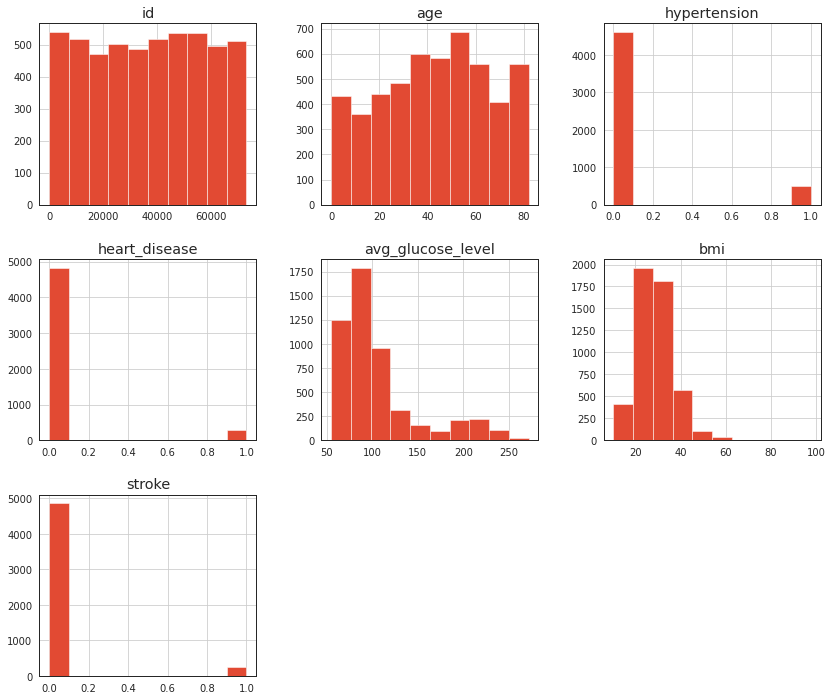

In [51]:
df_extra.corr()
exclude = []
df_extra.loc[:, df_extra.columns.difference(exclude)].hist(figsize = (14,12)) 

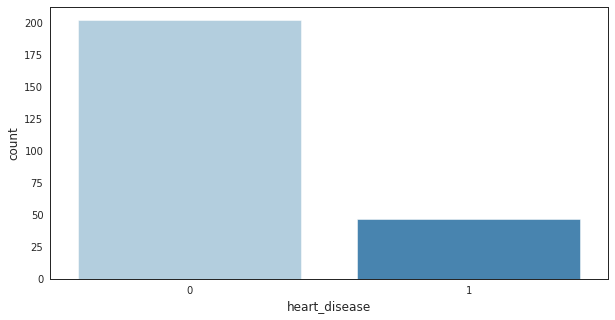

In [52]:
# Among people who have had a heart attack
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='heart_disease',palette='Blues');

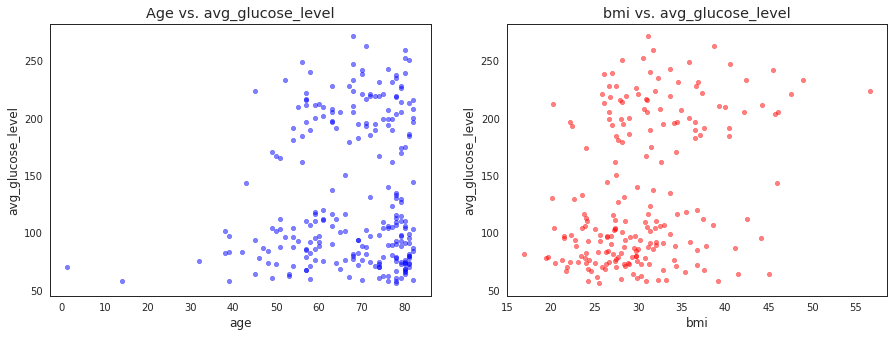

In [53]:
# Among people who have had a heart attack
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
strok.plot(kind='scatter', x='age', y='avg_glucose_level', alpha=0.5, color='blue', ax=axes[0], title="Age vs. avg_glucose_level")
strok.plot(kind='scatter', x='bmi', y='avg_glucose_level', alpha=0.5, color='red', ax=axes[1], title="bmi vs. avg_glucose_level")
plt.show()

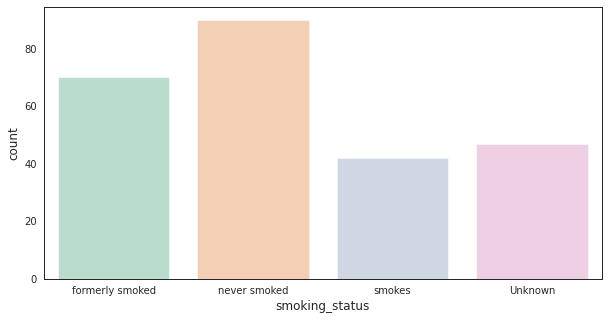

In [54]:
# Among people who have had a heart attack
plt.figure(figsize=(10,5))
sns.countplot(data=strok,x='smoking_status',palette='Pastel2');

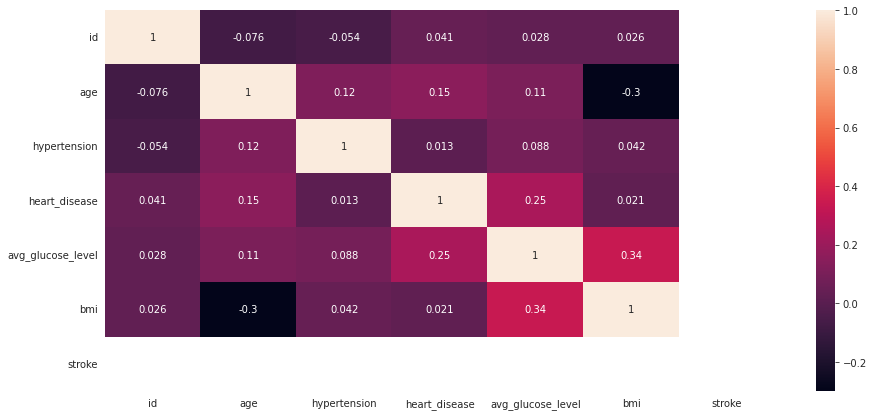

In [55]:
plt.figure(figsize=(15,7))
sns.heatmap(strok.corr(),annot=True);

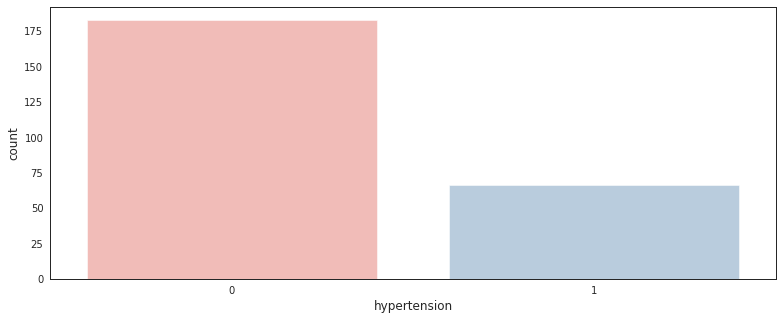

In [56]:
plt.figure(figsize=(13,5))
sns.countplot(data=strok,x='hypertension',palette='Pastel1');

## Future Work

In the second step of the project, the effects of the factors on heart disease, such as, chest pain, cholesterol and restBP, etc. will be examined and statistical tests will be applied. In addition, the effects of factors such as age and gender on heart disease will be examined and the extent of differences between these two factors will be examined again by statistical tests. In the Machine Learning section, at least two machine learning models will be developed that predict a person's heart disease condition. With these models developed, the person will learn the possibility of heart disease when they enter their information into the system according to statistical results. Hyper-parameter adjustment will also be made on the models to improve the performance of Machine Learning models.